In [2]:
import numpy as np
import pandas as pd

In [3]:
df= pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# UNI-Variate Analysis

### Age Column

In [5]:
df['Age'].describe()


count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

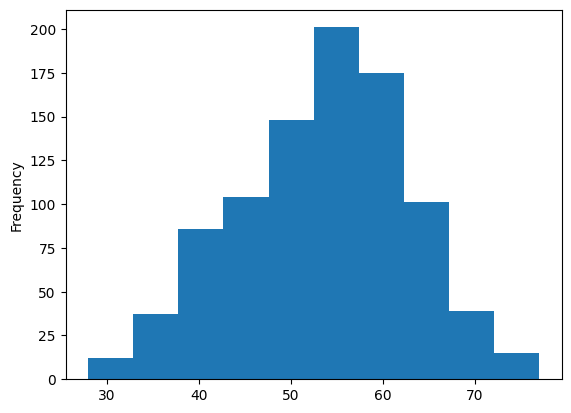

In [6]:
df['Age'].plot(kind='hist')

- **Most ages are between 50 and 60**

### Sex Column

In [7]:
count=df['Sex'].value_counts()
percent=df['Sex'].value_counts(normalize=True)*100
freq_table=pd.DataFrame({"Frequency": count, "Percentage": percent})
freq_table

,Frequency,Percentage
Sex,,
M,725,78.976035
F,193,21.023965


<Axes: xlabel='Sex'>

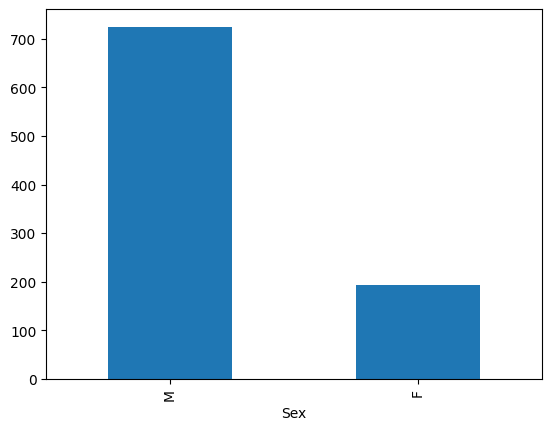

In [8]:
count.plot(kind='bar')


- **Males suffer more Heart diseases than females**

### Chest Pain Type

In [9]:
count=df['ChestPainType'].value_counts()
percent=df['ChestPainType'].value_counts(normalize=True)*100
freq_table=pd.DataFrame({"Frequency": count,"Percentage": percent})
print(freq_table)

               Frequency  Percentage
ChestPainType                       
ASY                  496   54.030501
NAP                  203   22.113290
ATA                  173   18.845316
TA                    46    5.010893


<Axes: xlabel='ChestPainType'>

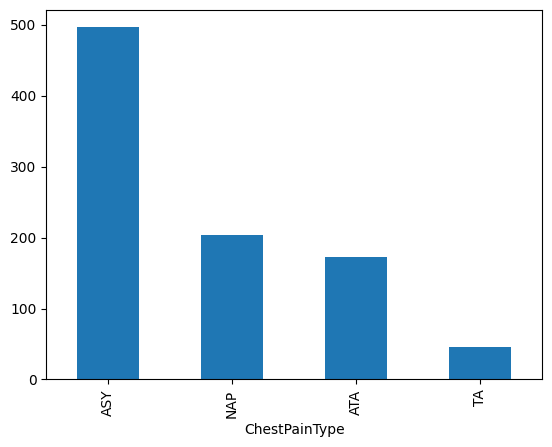

In [10]:

count.plot(kind='bar')

- **ASY is the most common chest pain type** 

### RestingBP column

In [11]:
df['RestingBP'].describe()

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

<Axes: ylabel='Frequency'>

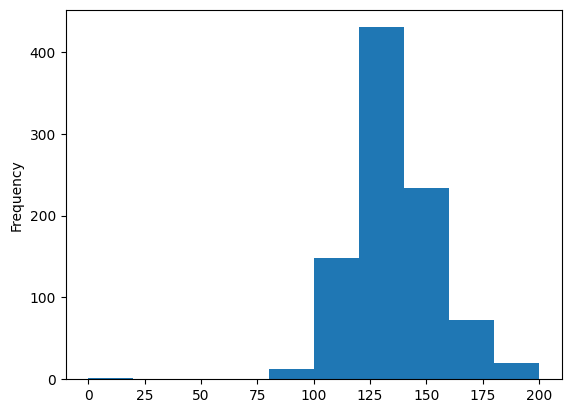

In [12]:
df['RestingBP'].plot(kind="hist")

In [13]:
Q1 = df['RestingBP'].quantile(0.25)
Q3 = df['RestingBP'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

90.0
170.0


In [14]:
outliers = df[(df['RestingBP'] < lower_bound) | (df['RestingBP'] > upper_bound)]
outliers

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
123,58,F,ATA,180,393,0,Normal,110,Y,1.0,Flat,1
189,53,M,ASY,180,285,0,ST,120,Y,1.5,Flat,1
190,46,M,ASY,180,280,0,ST,120,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
274,45,F,ATA,180,295,0,Normal,180,N,0.0,Up,0
275,59,M,NAP,180,213,0,Normal,100,N,0.0,Up,0
278,57,F,ASY,180,347,0,ST,126,Y,0.8,Flat,0
314,53,M,ASY,80,0,0,Normal,141,Y,2.0,Down,0
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1


- **The average is from 120-200**


# Cholesterol Column

In [15]:
df['Cholesterol'].describe()

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

<Axes: ylabel='Frequency'>

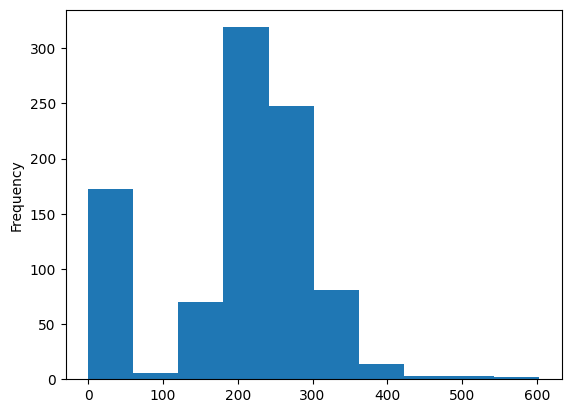

In [16]:
df['Cholesterol'].plot(kind='hist')

In [17]:
Q1 = df['Cholesterol'].quantile(0.25)
Q3 = df['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

32.625
407.625


In [18]:
outliers = df[(df['Cholesterol'] < lower_bound) | (df['Cholesterol'] > upper_bound)]
outliers

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,F,ATA,113,468,0,Normal,127,N,0.0,Up,0
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
69,44,M,ASY,150,412,0,Normal,170,N,0.0,Up,0
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
103,40,M,ASY,120,466,1,Normal,152,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1
536,62,M,NAP,133,0,1,ST,119,Y,1.2,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0
667,65,F,NAP,140,417,1,LVH,157,N,0.8,Up,0


- **Less than 200 is Good**

- **From 200-239 is Moderate**

- **High is from 240 or higher**

### FastingBS column

In [19]:
count=df['FastingBS'].value_counts()
percent=df['FastingBS'].value_counts(normalize=True)*100
freq_table=pd.DataFrame({"Frequency": count,"Percentage":percent})
print(freq_table)



           Frequency  Percentage
FastingBS                       
0                704   76.688453
1                214   23.311547


<Axes: ylabel='count'>

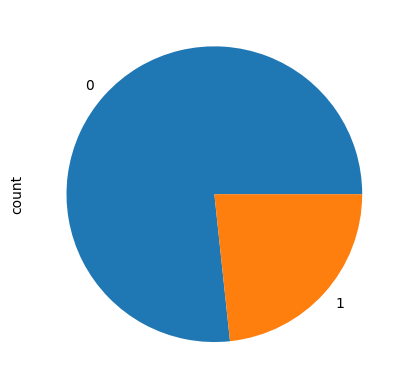

In [20]:
count.plot(kind='pie')

- **Most people don't have FastingBS**

### RestingECG column

In [21]:
count=df['RestingECG'].value_counts()
percent=df['RestingECG'].value_counts(normalize=True)*100
print(count)
freq_table=pd.DataFrame({"Frequency": count,"Percentage":percent})
print(freq_table)

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
            Frequency  Percentage
RestingECG                       
Normal            552   60.130719
LVH               188   20.479303
ST                178   19.389978


<Axes: xlabel='RestingECG'>

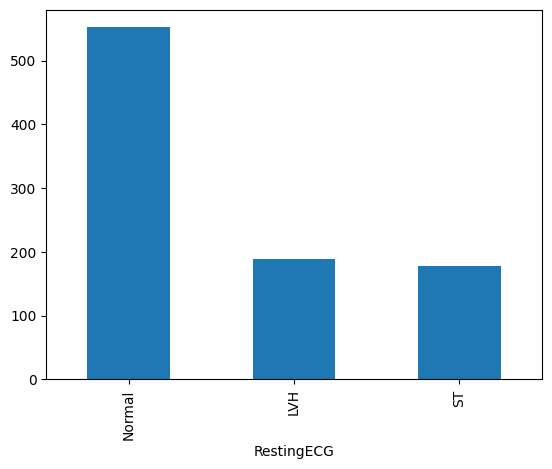

In [22]:
count.plot(kind='bar')

- **Most people are Normal**

### MaxHR column

In [23]:
df['MaxHR'].describe()


count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

<Axes: ylabel='Frequency'>

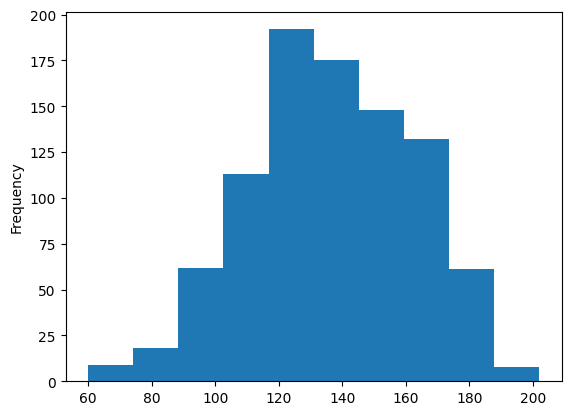

In [24]:
df['MaxHR'].plot(kind='hist')

In [25]:
Q1 = df['MaxHR'].quantile(0.25)
Q3 = df['MaxHR'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

66.0
210.0


In [26]:
outliers = df[(df['MaxHR'] < lower_bound) | (df['MaxHR'] > upper_bound)]
outliers

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
370,60,M,ASY,135,0,0,Normal,63,Y,0.5,Up,1
390,51,M,ASY,140,0,0,Normal,60,N,0.0,Flat,1


- **Subtract your age from 220**

### ExerciseAngina column

In [27]:
count=df['ExerciseAngina'].value_counts()
percent=df['ExerciseAngina'].value_counts(normalize=True)*100
freq_table=pd.DataFrame({"Frequency": count,'Percentage':percent})
print(freq_table)

                Frequency  Percentage
ExerciseAngina                       
N                     547   59.586057
Y                     371   40.413943


<Axes: xlabel='ExerciseAngina'>

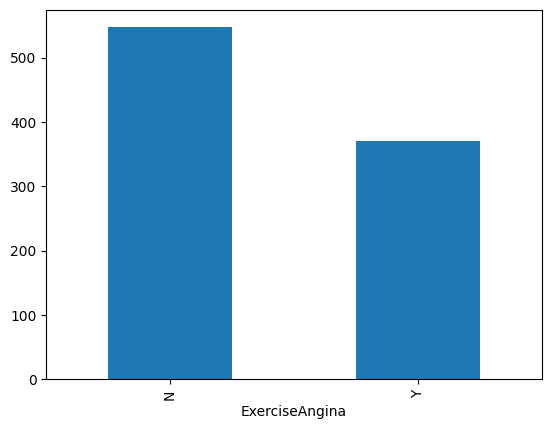

In [28]:
count.plot(kind='bar')

- **People have no ExerciseAngina more than people that have ExerciseAngina**

### Oldpeak Column

In [29]:
df['Oldpeak'].describe()

count    918.000000
mean       0.887364
std        1.066570
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

<Axes: ylabel='Frequency'>

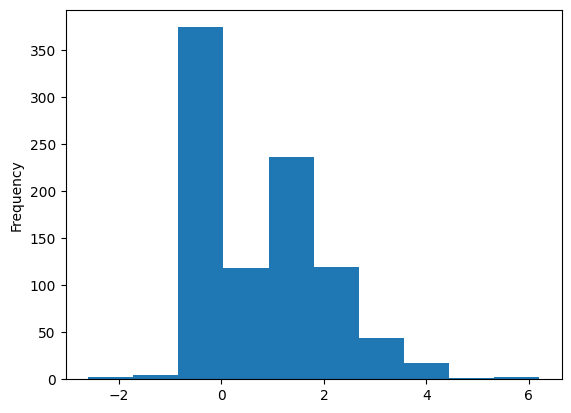

In [30]:
df['Oldpeak'].plot(kind='hist')


### ST_Slope column

In [31]:
count=df['ST_Slope'].value_counts()
percent=df['ST_Slope'].value_counts(normalize=True)*100
freq_table=pd.DataFrame({"Frequency": count,"Percentage":percent})
print(freq_table)

          Frequency  Percentage
ST_Slope                       
Flat            460   50.108932
Up              395   43.028322
Down             63    6.862745


<Axes: ylabel='count'>

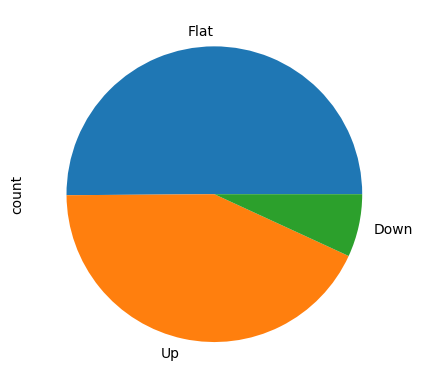

In [32]:
count.plot(kind='pie')

- **Most people Have Flat St-slope**

In [33]:
df.corr(numeric_only=True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [35]:
count=df['HeartDisease'].value_counts()
percent=df['HeartDisease'].value_counts(normalize=True)*100
freq_table=pd.DataFrame({"Frequency": count, "Percentage": percent})
print(freq_table)

              Frequency  Percentage
HeartDisease                       
1                   508   55.337691
0                   410   44.662309


<Axes: ylabel='count'>

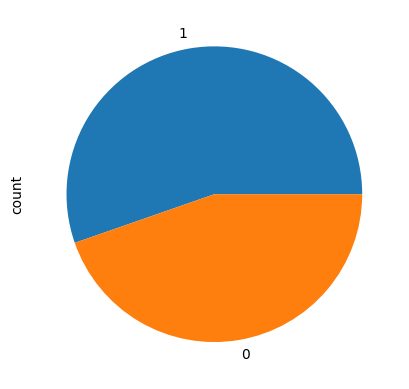

In [36]:
count.plot(kind='pie')

- **More people have heart disease**

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [38]:
df.groupby(['Sex'])['HeartDisease'].value_counts()

Sex  HeartDisease
F    0               143
     1                50
M    1               458
     0               267
Name: count, dtype: int64

- **Percentage of males getting a heart disease is higher than a female getting a Heart Disease**

In [39]:
df.groupby('RestingBP')['ChestPainType'].value_counts()

RestingBP  ChestPainType
0          NAP              1
80         ASY              1
92         ASY              1
94         NAP              2
95         ASY              5
                           ..
190        ASY              1
           ATA              1
192        ATA              1
200        ASY              3
           NAP              1
Name: count, Length: 158, dtype: int64

In [40]:
df.groupby('ChestPainType')['HeartDisease'].value_counts()  # or any other aggregate function


ChestPainType  HeartDisease
ASY            1               392
               0               104
ATA            0               149
               1                24
NAP            0               131
               1                72
TA             0                26
               1                20
Name: count, dtype: int64

- **The number of people that have ASY chest pain are the most people that have heart disease**

In [41]:
bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
df['AgeRange'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [42]:
df.groupby('AgeRange')['HeartDisease'].value_counts()

C:\Users\George Hany\AppData\Local\Temp\ipykernel_36876\1369587740.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeRange')['HeartDisease'].value_counts()


AgeRange  HeartDisease
<30       0                 4
          1                 0
30-39     0                50
          1                26
40-49     0               126
          1                85
50-59     1               212
          0               162
60-69     1               163
          0                59
70-79     1                22
          0                 9
80-89     0                 0
          1                 0
90+       0                 0
          1                 0
Name: count, dtype: int64

- **The Most ages that people got heart disease is from ages 40 to 69**

In [43]:
df.groupby(['AgeRange','Sex'])['HeartDisease'].mean()

C:\Users\George Hany\AppData\Local\Temp\ipykernel_36876\3577957396.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['AgeRange','Sex'])['HeartDisease'].mean()


AgeRange  Sex
<30       F           NaN
          M      0.000000
30-39     F      0.157895
          M      0.403509
40-49     F      0.115385
          M      0.496855
50-59     F      0.277778
          M      0.635762
60-69     F      0.454545
          M      0.803371
70-79     F      0.166667
          M      0.840000
80-89     F           NaN
          M           NaN
90+       F           NaN
          M           NaN
Name: HeartDisease, dtype: float64

- **The probablity of a Male to get heart disease keeps increasing till he is 80**


- **The probability of a Female getting a heart disease is always in average but increased during age 60-69**